In [29]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D


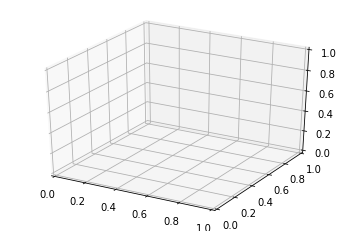

In [30]:
fig = plt.figure()
ax = fig.gca(projection='3d')
# prepare data

In [36]:
x = np.arange(-100,100,0.5)
y = np.arange(-100,100,0.5)
x, y = np.meshgrid(x,y)
a=0
b=0
z = np.square(a-x) + b*np.square(y - x**2)
ax.plot_surface(x,y,z,cmap='rainbow')

# fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

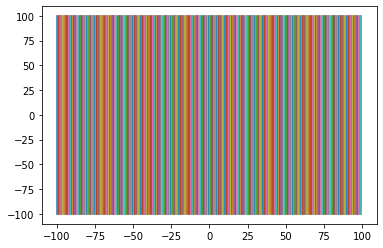

In [33]:
plt.plot(x,y)
plt.show()

In [32]:
def prepare_data():
    

SyntaxError: unexpected EOF while parsing (<ipython-input-32-219693be803d>, line 2)

请输入需要随机优化的次数：500
请输入随机优化的步长0.1
优化的时间:38.84秒!


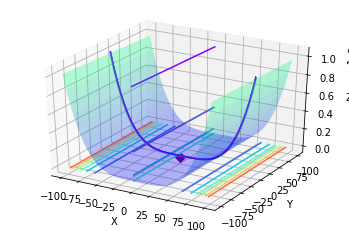

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
class Rosenbrock():
    def __init__(self):
        self.x1 = np.arange(-100, 100, 0.0001)
        self.x2 = np.arange(-100, 100, 0.0001)
        #self.x1, self.x2 = np.meshgrid(self.x1, self.x2)
        self.a = 1
        self.b = 1
        self.newton_times = 1000
        self.answers = []
        self.min_answer_z = []


    # 准备数据
    def data(self):
        z = np.square(self.a - self.x1) + self.b * np.square(self.x2 - np.square(self.x1))
        #print(z.shape)
        return z

    # 随机牛顿
    def snt(self,x1,x2,z,alpha):
        rand_init = np.random.randint(0,z.shape[0])
        x1_init,x2_init,z_init = x1[rand_init],x2[rand_init],z[rand_init]
        x_0 =np.array([x1_init,x2_init]).reshape((-1,1))
        #print(x_0)


        for i in range(self.newton_times):
            x_i = x_0 - np.matmul(np.linalg.inv(np.array([[12*x2_init**2-4*x2_init+2,-4*x1_init],[-4*x1_init,2]])),np.array([4*x1_init**3-4*x1_init*x2_init+2*x1_init-2,-2*x1_init**2+2*x2_init]).reshape((-1,1)))
            x_0 = x_i
            x1_init = x_0[0,0]
            x2_init = x_0[1,0]
        answer = x_0
        return answer


    # 绘图
    def plot_data(self,min_x1,min_x2,min_z):
        x1 = np.arange(-100, 100, 0.1)
        x2 = np.arange(-100, 100, 0.1)
        x1, x2 = np.meshgrid(x1, x2)
        a = 1
        b = 1
        z = np.square(a - x1) + b * np.square(x2 - np.square(x1))
        fig4 = plt.figure()
        ax4 = plt.axes(projection='3d')
        ax4.plot_surface(x1, x2, z, alpha=0.3, cmap='winter')  # 生成表面， alpha 用于控制透明度
        ax4.contour(x1, x2, z, zdir='z', offset=-3, cmap="rainbow")  # 生成z方向投影，投到x-y平面
        ax4.contour(x1, x2, z, zdir='x', offset=-6, cmap="rainbow")  # 生成x方向投影，投到y-z平面
        ax4.contour(x1, x2, z, zdir='y', offset=6, cmap="rainbow")  # 生成y方向投影，投到x-z平面
        ax4.contourf(x1, x2, z, zdir='y', offset=6, cmap="rainbow")  # 生成y方向投影填充，投到x-z平面，contourf()函数
        ax4.scatter(min_x1,min_x2,min_z,c='purple',marker='D',s=50)
        # 设定显示范围
        ax4.set_xlabel('X')
        ax4.set_ylabel('Y')
        ax4.set_zlabel('Z')
        plt.show()

    # 开始
    def start(self):
        times = int(input("请输入需要随机优化的次数："))
        alpha = float(input("请输入随机优化的步长"))
        z = self.data()
        start_time = time.time()
        for i in range(times):
            answer = self.snt(self.x1,self.x2,z,alpha)
            self.answers.append(answer)
        min_answer = np.array(self.answers)
        for i in range(times):
            self.min_answer_z.append((1-min_answer[i,0,0])**2+(min_answer[i,1,0]-min_answer[i,0,0]**2)**2)
        optimal_z = np.min(np.array(self.min_answer_z))
        optimal_z_index = np.argmin(np.array(self.min_answer_z))
        optimal_x1,optimal_x2 = min_answer[optimal_z_index,0,0],min_answer[optimal_z_index,1,0]
        end_time = time.time()
        running_time = end_time-start_time
        print("优化的时间:%.2f秒!" % running_time)
        self.plot_data(optimal_x1,optimal_x2,optimal_z)
if __name__ == '__main__':
    snt = Rosenbrock()
    snt.start()